# Install Dependencies

In [1]:
!python -m pip install paddlepaddle-gpu==3.0.0rc1 -i https://www.paddlepaddle.org.cn/packages/stable/cu118/

Looking in indexes: https://www.paddlepaddle.org.cn/packages/stable/cu118/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 GB 1.4 MB/s eta 0:00:00:00:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 14.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 15.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.9/699.9 MB 1.3 MB/s eta 0:00:00:00:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 3.0 MB/s eta 0:00:0000:01m00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.6 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 11.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 5.8 MB/s eta 0:00:0000:01m00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 5.9 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━

In [2]:
!pip install lmdb
!pip install rapidfuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.8/297.8 kB 901.4 kB/s eta 0:00:000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 34.3 MB/s eta 0:00:0000:0100:01


In [3]:
!git clone https://github.com/PaddlePaddle/PaddleOCR.git

Cloning into 'PaddleOCR'...
remote: Enumerating objects: 227549, done.
remote: Counting objects: 100% (4173/4173), done.
remote: Compressing objects: 100% (748/748), done.
remote: Total 227549 (delta 3889), reused 3425 (delta 3425), pack-reused 223376 (from 4)
Receiving objects: 100% (227549/227549), 1.20 GiB | 36.61 MiB/s, done.
Resolving deltas: 100% (179695/179695), done.


In [4]:
# Check if paddle installed properly
import paddle
paddle.utils.run_check()

/usr/local/lib/python3.11/dist-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)


Running verify PaddlePaddle program ... 


I0528 05:16:28.552006    35 pir_interpreter.cc:1508] New Executor is Running ...
W0528 05:16:28.552346    35 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 7.5, Driver API Version: 12.6, Runtime API Version: 11.8
W0528 05:16:28.553437    35 gpu_resources.cc:164] device: 0, cuDNN Version: 8.9.
I0528 05:16:28.699717    35 pir_interpreter.cc:1531] pir interpreter is running by multi-thread mode ...


PaddlePaddle works well on 1 GPU.


/usr/local/lib/python3.11/dist-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
/usr/local/lib/python3.11/dist-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
======================= Modified FLAGS detected =======================
FLAGS(name='FLAGS_enable_pir_in_executor', current_value=True, default_value=False)
FLAGS(name='FLAGS_cusparse_dir', current_value='/usr/local/lib/python3.11/dist-packages/paddle/../nvidia/cusparse/lib', default_value='')
FLAGS(name='FLAGS_nvidia_package_dir', current_value='/usr/l

PaddlePaddle works well on 2 GPUs.
PaddlePaddle is installed successfully! Let's start deep learning with PaddlePaddle now.


In [5]:
!ls

PaddleOCR


In [6]:
cd PaddleOCR

/kaggle/working/PaddleOCR


In [7]:
!pip install -r requirements.txt

# EDA

In [8]:
DATASET_DIR = r'/kaggle/input/nomnaocr/Patches'
ALL_TRANSCRIPTS_PATH = f'{DATASET_DIR}/All.txt'
VALID_TRANSCRIPTS_PATH = f'{DATASET_DIR}/Validate.txt'
FONT_PATH = r'/kaggle/input/nomnafont/NomNaTong-Regular.ttf'

In [9]:
import os
import re
import numpy as np
import tensorflow as tf
from string import printable
from collections import defaultdict, Counter

class DataImporter:
    def __init__(self, dataset_dir, labels_path, min_length=4, font_path=None):
        self.img_paths, self.labels = [], []
        self.font_path = font_path
        with open(labels_path, 'r', encoding='utf-8') as file:
            for line in file:
                img_name, text = line.rstrip('\n').split('\t')
                img_path = os.path.join(dataset_dir, img_name)
                text = text.strip().lower()

                if os.path.getsize(img_path) and len(text) >= min_length and self.is_clean_text(text):
                    self.img_paths.append(img_path)
                    self.labels.append(text)
        
        assert len(self.img_paths) == len(self.labels), 'img_paths and labels must have same size'
        self.img_paths = np.array(self.img_paths)
        self.labels = np.array(self.labels)
        self.vocabs = dict(Counter(''.join(self.labels)).most_common())
        self.size = len(self.labels)


    def remove_rare_chars(self, threshold=1):
        if threshold < 2: return self
        rare_chars, idxs_to_remove = [], []
        is_satisfy_threshold = True

        # Vocabs need to be sorted (for faster checking)
        for char, freq in reversed(self.vocabs.items()):
            if freq < threshold: rare_chars.append(char)
            else: break

        for idx, label in enumerate(self.labels):
            if any((char in label) for char in rare_chars):
                idxs_to_remove.append(idx)

        # Remove sentences containing rare characters and recalculate the vocab frequencies
        idxs_to_remove = np.array(idxs_to_remove)
        self.img_paths = np.delete(self.img_paths, idxs_to_remove)
        self.labels = np.delete(self.labels, idxs_to_remove)

        assert len(self.img_paths) == len(self.labels), 'img_paths and labels must have same size'
        self.vocabs = dict(Counter(''.join(self.labels)).most_common())
        self.size = len(self.labels)

        # Check if there are still rare characters after removing sentences
        smallest_freq = threshold + 1 # If vocabs is empty, the smallest frequency always > threshold
        if len(self.vocabs) >= 1: smallest_freq = list(self.vocabs.values())[-1] 
        return self.remove_rare_chars(threshold) if smallest_freq < threshold else self


    def is_clean_text(self, text):
        not_nom_chars = r'\sáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ'
        pattern = re.compile(f'[{not_nom_chars}{re.escape(printable)}]')
        return not bool(re.search(pattern, text.lower()))


    def show_sample_text(self, num_samples=5):
        print(f"Sample labels (using font: {self.font_path if self.font_path else 'default system font'}):")
        for i in range(min(num_samples, len(self.labels))):
            print(f"{i+1}: {self.labels[i]}")

    def __str__(self):
        return (
            f'Samples count (not include Latin letters, numbers, punctuations):'
            f'\n- Number of images found: {len(self.img_paths)}'
            f'\n- Number of labels found: {len(self.labels)}'
            f'\n- Number of unique characters: {len(self.vocabs)}'
            f'\n- Characters present: {self.vocabs}'
        )




2025-05-28 05:18:02.027110: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748409482.205162      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748409482.258071      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [11]:
dataset = DataImporter(DATASET_DIR, ALL_TRANSCRIPTS_PATH, min_length=1, font_path=FONT_PATH)
print(dataset)

Samples count (not include Latin letters, numbers, punctuations):
- Number of images found: 37836
- Number of labels found: 37836
- Number of unique characters: 7479
- Characters present: {'之': 7523, '以': 4796, '人': 3550, '月': 3446, '十': 3252, '不': 3145, '年': 3012, '帝': 2689, '有': 2541, '二': 2492, '其': 2449, '大': 2312, '日': 2260, '為': 2228, '等': 2082, '爲': 2018, '而': 1973, '國': 1946, '一': 1931, '軍': 1880, '王': 1872, '太': 1871, '公': 1830, '天': 1829, '子': 1792, '三': 1784, '官': 1783, '兵': 1778, '明': 1721, '曰': 1680, '於': 1629, '至': 1625, '使': 1597, '時': 1562, '者': 1561, '阮': 1550, '事': 1521, '臣': 1519, '也': 1498, '黎': 1409, '及': 1384, '文': 1374, '皇': 1359, '上': 1358, '如': 1352, '是': 1299, '行': 1258, '安': 1250, '五': 1240, '士': 1240, '中': 1217, '元': 1207, '四': 1199, '命': 1166, '下': 1165, '自': 1161, '民': 1120, '所': 1113, '宗': 1095, '書': 1047, '州': 1044, '六': 1029, '得': 1028, '道': 1015, '武': 1008, '于': 999, '生': 988, '都': 957, '吏': 946, '城': 939, '正': 922, '将': 907, '知': 899, '各': 889, '令': 8

In [14]:
dataset.show_sample_text()

Sample labels (using font: /kaggle/input/nomnafont/NomNaTong-Regular.ttf):
1: 不得棄本遂末并托以販賣技術游足游手其有
2: 㐌衝身世群算浽芇
3: 象七隻來献營門王大喜九月捕得吳廷峩
4: 𢚸貞払𡏡劳刀󰡪蜍
5: 十一月除税使鋪正等職令勑旨󰱥今各税務


In [12]:
def save_vocab_to_txt(filepath, vocab):
    with open(filepath, 'w', encoding='utf-8') as f:
        for char in vocab:
            if isinstance(char, bytes):
                char = char.decode('utf-8', errors='ignore')  # hoặc 'replace'
            f.write(f"{char}\n")


In [13]:
save_vocab_to_txt("vocab.txt", dataset.vocabs.keys())


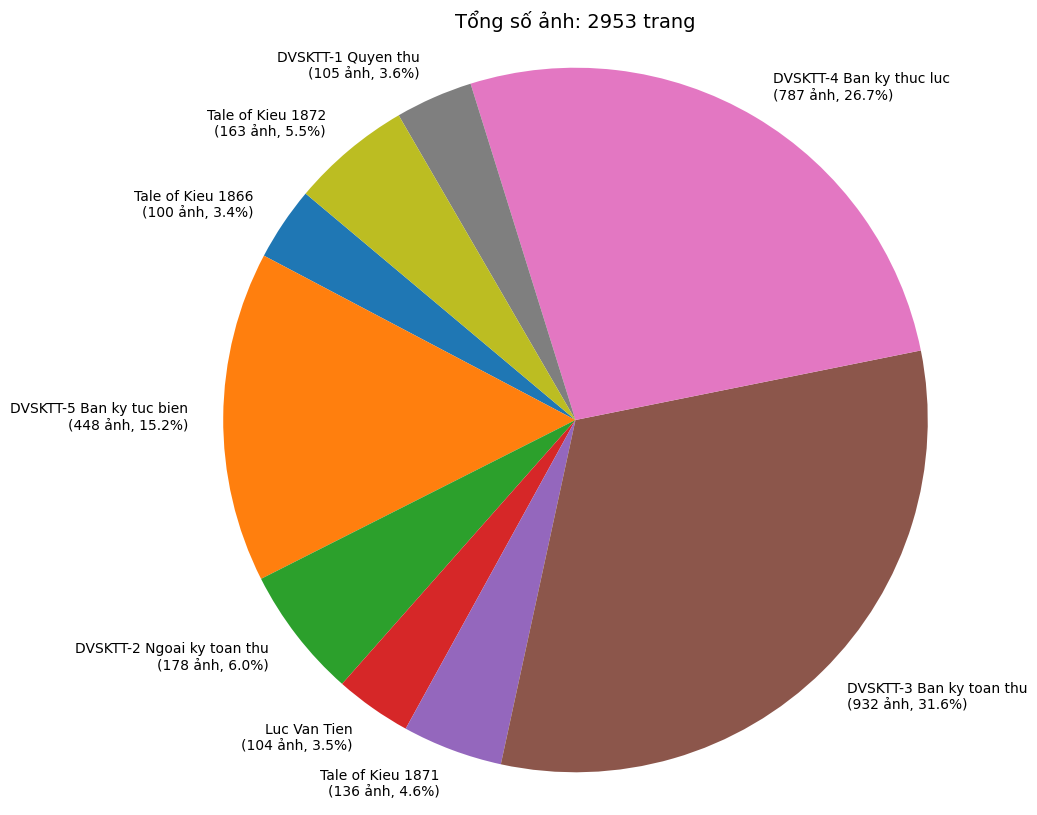

In [17]:
import os
from pathlib import Path
import matplotlib.pyplot as plt

base_path = Path("/kaggle/input/d/toruhtgpu2/nomnaocr/data/Pages")

subfolders = [f for f in base_path.iterdir() if f.is_dir()]

folder_names = []
image_counts = []

for folder in subfolders:
    image_files = list(folder.glob("imgs/*.jpg")) + \
                  list(folder.glob("imgs/*.png")) + \
                  list(folder.glob("imgs/*.jpeg"))
    folder_names.append(folder.name)
    image_counts.append(len(image_files))

total_images = sum(image_counts)

labels = [f"{name}\n({count} ảnh, {count/total_images:.1%})"
          for name, count in zip(folder_names, image_counts)]

plt.figure(figsize=(10, 10))
plt.pie(image_counts, labels=labels, startangle=140)
plt.axis('equal')  
plt.title(f"Tổng số ảnh: {total_images} trang", fontsize=14)
plt.show()


# Train Detection

In [12]:
det_yaml_config = """
Global:
    use_gpu: true
    epoch_num: 15
    log_smooth_window: 20
    print_batch_step: 369
    save_model_dir: ./output/dbnet/
    save_epoch_step: 369
    eval_batch_step: 369
    cal_metric_during_train: False
    pretrained_model:
    checkpoints:
    save_inference_dir:
    use_visualdl: False
    infer_img:
    save_res_path: ./output/det_db/predicts_db.txt

Architecture:
    model_type: det
    algorithm: DB
    Transform:
    Backbone:
        name: ResNet_vd
        layers: 18
    Neck:
        name: DBFPN
        out_channels: 256
    Head:
        name: DBHead
        k: 50

Loss:
    name: DBLoss
    balance_loss: true
    main_loss_type: DiceLoss
    alpha: 5
    beta: 10
    ohem_ratio: 3

Optimizer:
    name: Adam
    beta1: 0.9
    beta2: 0.999
    lr:
        name: Cosine
        learning_rate: 0.001
        warmup_epoch: 2
    regularizer:
        name: 'L2'
        factor: 0

PostProcess:
    name: DBPostProcess
    thresh: 0.3
    box_thresh: 0.5
    max_candidates: 1000
    unclip_ratio: 2.5

Metric:
    name: DetMetric
    main_indicator: hmean

Train:
    dataset:
        name: SimpleDataSet
        data_dir: /kaggle/input/d/toruhtgpu2/nomnaocr/data/Pages
        label_file_list:
            - /kaggle/input/d/toruhtgpu2/nomnaocr/data/Pages/PaddleOCR-Train.txt
        ratio_list: [1.0]
        transforms:
            - DecodeImage: # load image
                  img_mode: BGR
                  channel_first: False
            - DetLabelEncode: # Class handling label
            - IaaAugment:
                  augmenter_args:
                      - { 'type': Affine, 'args': { 'rotate': [-10, 10] } }
                      - { 'type': Resize, 'args': { 'size': [0.5, 3] } }
            - EastRandomCropData:
                  size: [960, 960]
                  max_tries: 50
                  keep_ratio: true
            - MakeBorderMap:
                  shrink_ratio: 0.4
                  thresh_min: 0.3
                  thresh_max: 0.7
            - MakeShrinkMap:
                  shrink_ratio: 0.4
                  min_text_size: 8
            - NormalizeImage:
                  scale: 1./255.
                  mean: [0.485, 0.456, 0.406]
                  std: [0.229, 0.224, 0.225]
                  order: 'hwc'
            - ToCHWImage:
            - KeepKeys:
                  keep_keys: [
                          'image',
                          'threshold_map',
                          'threshold_mask',
                          'shrink_map',
                          'shrink_mask',
                      ] # the order of the dataloader list
    loader:
        shuffle: True
        drop_last: False
        batch_size_per_card: 8
        num_workers: 0

Eval:
    dataset:
        name: SimpleDataSet
        data_dir: /kaggle/input/d/toruhtgpu2/nomnaocr/data/Pages
        label_file_list:
            - /kaggle/input/d/toruhtgpu2/nomnaocr/data/Pages/PaddleOCR-Validate.txt
        transforms:
            - DecodeImage: # load image
                  img_mode: BGR
                  channel_first: False
            - DetLabelEncode: # Class handling label
            - DetResizeForTest:
            #           image_shape: [736, 1280]
            - NormalizeImage:
                  scale: 1./255.
                  mean: [0.485, 0.456, 0.406]
                  std: [0.229, 0.224, 0.225]
                  order: 'hwc'
            - ToCHWImage:
            - KeepKeys:
                  keep_keys: ['image', 'shape', 'polys', 'ignore_tags']
    loader:
        shuffle: False
        drop_last: False
        batch_size_per_card: 1 # must be 1
        num_workers: 0
  
"""

# Ghi ra file
with open("dbnet_train.yml", "w") as f:
    f.write(det_yaml_config)


In [ ]:
!python -m paddle.distributed.launch --log_dir=./debug/ --gpus '0,1' tools/train.py -c /kaggle/working/PaddleOCR/dbnet_train.yml

/usr/local/lib/python3.11/dist-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
LAUNCH INFO 2025-05-26 18:20:59,263 -----------  Configuration  ----------------------
LAUNCH INFO 2025-05-26 18:20:59,263 auto_cluster_config: 0
LAUNCH INFO 2025-05-26 18:20:59,263 auto_parallel_config: None
LAUNCH INFO 2025-05-26 18:20:59,263 auto_tuner_json: None
LAUNCH INFO 2025-05-26 18:20:59,263 devices: 0,1
LAUNCH INFO 2025-05-26 18:20:59,263 elastic_level: -1
LAUNCH INFO 2025-05-26 18:20:59,263 elastic_timeout: 30
LAUNCH INFO 2025-05-26 18:20:59,263 enable_gpu_log: True
LAUNCH INFO 2025-05-26 18:20:59,263 gloo_port: 6767
LAUNCH INFO 2025-05-26 18:20:59,263 host: None
LAUNCH INFO 2025-05-26 18:20:59,263 ips: None
LAUNCH INFO 2025-05-26 18:20:59,263 job_id: defau

# Train Recognition

## IMG processing

In [11]:
import os
from PIL import Image
import shutil
from concurrent.futures import ThreadPoolExecutor

base_dir = '/kaggle/input/d/toruhtgpu2/nomnaocr/data/Patches'
output_dir = '/kaggle/working/rotated_images'
os.makedirs(output_dir, exist_ok=True)

image_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.tiff')
text_extension = '.txt'

def process_file(args):
    input_path, output_path = args
    ext = os.path.splitext(input_path)[1].lower()

    try:
        if ext in image_extensions:
            with Image.open(input_path) as img:
                rotated_img = img.rotate(90, expand=True)
                rotated_img.save(output_path)
        elif ext == text_extension:
            shutil.copy2(input_path, output_path)
    except Exception as e:
        print(f"Error processing {input_path}: {e}")

# Prepare list of files to process
tasks = []
for root, _, files in os.walk(base_dir):
    rel_path = os.path.relpath(root, base_dir)
    output_folder = os.path.join(output_dir, rel_path)
    os.makedirs(output_folder, exist_ok=True)

    for file in files:
        ext = os.path.splitext(file)[1].lower()
        if ext in image_extensions or ext == text_extension:
            input_path = os.path.join(root, file)
            output_path = os.path.join(output_folder, file)
            tasks.append((input_path, output_path))

# Process files in parallel
with ThreadPoolExecutor() as executor:
    executor.map(process_file, tasks)

print("Image rotation and text file copying completed.")


Image rotation and text file copying completed.


## Training

In [ ]:
sar_yaml_config = """
Global:
  use_gpu: true
  epoch_num: 50
  log_smooth_window: 20
  print_batch_step: 20
  save_model_dir: ./sar_rec
  save_best_model: True
  save_epoch_step: 1000  
  eval_batch_step: [0, 2000]
  cal_metric_during_train: True
  pretrained_model:
  checkpoints: 
  save_inference_dir:
  use_visualdl: False
  infer_img: 
  character_dict_path: /kaggle/input/character-dict/vocab.txt
  max_text_length: 30
  infer_mode: False
  use_space_char: False
  rm_symbol: True
  save_res_path: ./sar_rec/predicts_sar.txt

Optimizer:
  name: Adam
  beta1: 0.9
  beta2: 0.999
  lr:
    name: Piecewise
    warmup_epoch: 3
    decay_epochs: [20, 40]
    values: [0.01, 0.001, 0.0001] 
  regularizer:
    name: 'L2'
    factor: 0

Architecture:
  model_type: rec
  algorithm: SAR
  Transform:
  Backbone:
    name: ResNet31
  Head:
    name: SARHead

Loss:
  name: SARLoss

PostProcess:
  name: SARLabelDecode

Metric:
  name: RecMetric
  main_indicator: norm_edit_dis

Train:
  dataset:
    name: SimpleDataSet
    data_dir: /kaggle/working/rotated_images/
    label_file_list: 
      - /kaggle/working/rotated_images/Train.txt
    ratio_list: 1.0
    transforms:
      - DecodeImage:
          img_mode: BGR
          channel_first: False
      - SARLabelEncode:
      - SARRecResizeImg:
          image_shape: [3, 48, 48, 160]
          width_downsample_ratio: 0.25
      - KeepKeys:
          keep_keys: ['image', 'label', 'valid_ratio']
  loader:
    shuffle: True
    batch_size_per_card: 64
    drop_last: True
    num_workers: 8
    use_shared_memory: False

Eval:
  dataset:
    name: SimpleDataSet
    data_dir: /kaggle/working/rotated_images/
    label_file_list: 
      - /kaggle/working/rotated_images/Validate.txt
    transforms:
      - DecodeImage:
          img_mode: BGR
          channel_first: False
      - SARLabelEncode:
      - SARRecResizeImg:
          image_shape: [3, 48, 48, 160]
          width_downsample_ratio: 0.25
      - KeepKeys:
          keep_keys: ['image', 'label', 'valid_ratio']
  loader:
    shuffle: False
    drop_last: False
    batch_size_per_card: 64
    num_workers: 4
    use_shared_memory: False
  
"""

# Ghi ra file
with open("rec_sar_train.yml", "w") as f:
    f.write(sar_yaml_config)


In [ ]:
!python -m paddle.distributed.launch --log_dir=./debug/ --gpus '0,1' tools/train.py -c /kaggle/working/PaddleOCR/rec_sar_train.yml

# Eval Detection

In [22]:
eval_det_yaml_config = """
Global:
    use_gpu: true
    epoch_num: 15
    log_smooth_window: 20
    print_batch_step: 369
    save_model_dir: ./output/dbnet/
    save_epoch_step: 369
    eval_batch_step: 369
    cal_metric_during_train: False
    pretrained_model: /kaggle/input/dbnet/other/default/1/model (1).pdparams
    checkpoints:
    save_inference_dir:
    use_visualdl: False
    infer_img:
    save_res_path: ./output/det_db/predicts_db.txt
    eval_mode: True

Architecture:
    model_type: det
    algorithm: DB
    Transform:
    Backbone:
        name: ResNet_vd
        layers: 18
    Neck:
        name: DBFPN
        out_channels: 256
    Head:
        name: DBHead
        k: 50

Loss:
    name: DBLoss
    balance_loss: true
    main_loss_type: DiceLoss
    alpha: 5
    beta: 10
    ohem_ratio: 3

Optimizer:
    name: Adam
    beta1: 0.9
    beta2: 0.999
    lr:
        name: Cosine
        learning_rate: 0.001
        warmup_epoch: 2
    regularizer:
        name: 'L2'
        factor: 0

PostProcess:
    name: DBPostProcess
    thresh: 0.3
    box_thresh: 0.5
    max_candidates: 1000
    unclip_ratio: 2.5

Metric:
    name: DetMetric
    main_indicator: hmean


Eval:
    dataset:
        name: SimpleDataSet
        data_dir: /kaggle/input/d/toruhtgpu2/nomnaocr/data/Pages
        label_file_list:
            - /kaggle/input/d/toruhtgpu2/nomnaocr/data/Pages/Test_poem.txt
        transforms:
            - DecodeImage: # load image
                  img_mode: BGR
                  channel_first: False
            - DetLabelEncode: # Class handling label
            - DetResizeForTest:
            #           image_shape: [736, 1280]
            - NormalizeImage:
                  scale: 1./255.
                  mean: [0.485, 0.456, 0.406]
                  std: [0.229, 0.224, 0.225]
                  order: 'hwc'
            - ToCHWImage:
            - KeepKeys:
                  keep_keys: ['image', 'shape', 'polys', 'ignore_tags']
    loader:
        shuffle: False
        drop_last: False
        batch_size_per_card: 1 # must be 1
        num_workers: 0
  
"""

# Ghi ra file
with open("dbnet_eval.yml", "w") as f:
    f.write(eval_det_yaml_config)


In [23]:
!python tools/eval.py -c dbnet_eval.yml

/usr/local/lib/python3.11/dist-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
[2025/05/27 18:26:28] ppocr WARNING: Skipping import of the encryption module.
[2025/05/27 18:26:28] ppocr INFO: Architecture : 
[2025/05/27 18:26:28] ppocr INFO:     Backbone : 
[2025/05/27 18:26:28] ppocr INFO:         layers : 18
[2025/05/27 18:26:28] ppocr INFO:         name : ResNet_vd
[2025/05/27 18:26:28] ppocr INFO:     Head : 
[2025/05/27 18:26:28] ppocr INFO:         k : 50
[2025/05/27 18:26:28] ppocr INFO:         name : DBHead
[2025/05/27 18:26:28] ppocr INFO:     Neck : 
[2025/05/27 18:26:28] ppocr INFO:         name : DBFPN
[2025/05/27 18:26:28] ppocr INFO:         out_channels : 256
[2025/05/27 18:26:28] ppocr INFO:     Transform : None
[2025/05/27 18:26

# Eval Recogition

In [24]:
eval_sar_yaml_config = """
Global:
  use_gpu: true
  epoch_num: 50
  log_smooth_window: 20
  print_batch_step: 20
  save_model_dir: ./sar_rec
  save_best_model: True
  save_epoch_step: 1000
  eval_batch_step: [0, 2000]
  cal_metric_during_train: True
  pretrained_model: /kaggle/input/sarrnn/other/default/1/model.pdparams 
  checkpoints:
  save_inference_dir:
  use_visualdl: False
  infer_img: /kaggle/working/rotated_images/DVSKTT-1 Quyen thu/DVSKTT_thu_III_1a_0.jpg
  character_dict_path: /kaggle/input/character-dict/vocab.txt
  max_text_length: 30
  infer_mode: True
  use_space_char: False
  rm_symbol: True
  save_res_path: ./sar_rec/predicts_sar.txt
  eval_mode: False  

Optimizer:
  name: Adam
  beta1: 0.9
  beta2: 0.999
  lr:
    name: Piecewise
    warmup_epoch: 3
    decay_epochs: [20, 40]
    values: [0.01, 0.001, 0.0001]
  regularizer:
    name: 'L2'
    factor: 0

Architecture:
  model_type: rec
  algorithm: SAR
  Transform:
  Backbone:
    name: ResNet31
  Head:
    name: SARHead

Loss:
  name: SARLoss

PostProcess:
  name: SARLabelDecode

Metric:
  name: RecMetric
  main_indicator: norm_edit_dis

Eval:
  dataset:
    name: SimpleDataSet
    data_dir: /kaggle/working/rotated_images/
    label_file_list:
      - /kaggle/working/rotated_images/Test_prose.txt
    transforms:
      - DecodeImage:
          img_mode: BGR
          channel_first: False
      - SARLabelEncode:
      - SARRecResizeImg:
          image_shape: [3, 48, 48, 160]
          width_downsample_ratio: 0.25
      - KeepKeys:
          keep_keys: ['image', 'label', 'valid_ratio']
  loader:
    shuffle: False
    drop_last: False
    batch_size_per_card: 64
    num_workers: 4
    use_shared_memory: False
"""

# Ghi ra file cấu hình
with open("rec_sar_eval.yml", "w") as f:
    f.write(eval_sar_yaml_config)


In [25]:
!python tools/eval.py -c rec_sar_eval.yml

/usr/local/lib/python3.11/dist-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
[2025/05/27 18:30:19] ppocr WARNING: Skipping import of the encryption module.
[2025/05/27 18:30:19] ppocr INFO: Architecture : 
[2025/05/27 18:30:19] ppocr INFO:     Backbone : 
[2025/05/27 18:30:19] ppocr INFO:         name : ResNet31
[2025/05/27 18:30:19] ppocr INFO:     Head : 
[2025/05/27 18:30:19] ppocr INFO:         name : SARHead
[2025/05/27 18:30:19] ppocr INFO:     Transform : None
[2025/05/27 18:30:19] ppocr INFO:     algorithm : SAR
[2025/05/27 18:30:19] ppocr INFO:     model_type : rec
[2025/05/27 18:30:19] ppocr INFO: Eval : 
[2025/05/27 18:30:19] ppocr INFO:     dataset : 
[2025/05/27 18:30:19] ppocr INFO:         data_dir : /kaggle/working/rotated_image

# Inference Time

In [ ]:
import os
import cv2
import json
import glob
import subprocess

def run_detection(img_path, det_config, save_dir):
    os.makedirs(save_dir, exist_ok=True)
    cmd = f"""python3 tools/infer_det.py \
        -c {det_config} \
        -o Global.infer_img="{img_path}" \
           Global.save_res_path="{save_dir}/det_result.txt" \
           Global.save_crop_res=False """  # tạm thời không auto crop để tự crop thủ công
    print(f"Running detection on {img_path}")
    subprocess.run(cmd, shell=True, check=True)
    det_file = os.path.join(save_dir, "det_result.txt")
    if not os.path.exists(det_file):
        raise RuntimeError(f"Detection result file not found: {det_file}")
    print(f"Detection done, results saved to {det_file}")
    return det_file

def crop_from_det_result(img_path, det_result_file, crop_save_dir):
    os.makedirs(crop_save_dir, exist_ok=True)
    with open(det_result_file, "r", encoding="utf-8") as f:
        lines = f.readlines()

    count = 0
    for line in lines:
        line = line.strip()
        if not line:
            continue
        parts = line.split("\t")
        if len(parts) != 2:
            print(f"Skipping invalid line: {line}")
            continue

        image_file, json_str = parts
        if image_file != img_path:
            # Nếu file này không phải ảnh bạn đang xử lý, bỏ qua
            continue

        data = json.loads(json_str)
        img = cv2.imread(img_path)
        if img is None:
            raise RuntimeError(f"Cannot load image {img_path}")

        for i, item in enumerate(data):
            pts = item["points"]  # dạng list 4 điểm, mỗi điểm [x,y]
            # Tính bounding box bao quanh 4 điểm
            xs = [p[0] for p in pts]
            ys = [p[1] for p in pts]
            x_min, x_max = int(min(xs)), int(max(xs))
            y_min, y_max = int(min(ys)), int(max(ys))
            crop_img = img[y_min:y_max, x_min:x_max]
            crop_filename = os.path.join(crop_save_dir, f"crop_{count:04d}.png")
            cv2.imwrite(crop_filename, crop_img)
            count += 1
    print(f"Cropped {count} images to {crop_save_dir}")

def rotate_all_crops(crop_dir, rotated_dir):
    os.makedirs(rotated_dir, exist_ok=True)
    count = 0
    for path in glob.glob(os.path.join(crop_dir, "*.png")):
        img = cv2.imread(path)
        if img is None:
            print(f"Warning: Could not read {path}")
            continue
        rotated = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
        filename = os.path.basename(path)
        cv2.imwrite(os.path.join(rotated_dir, filename), rotated)
        count += 1
    if count == 0:
        raise RuntimeError(f"No valid crop images to rotate in {crop_dir}")
    print(f"Rotated {count} images and saved to {rotated_dir}")

def run_recognition(img_dir, rec_config, output_txt):
    if not os.listdir(img_dir):
        raise RuntimeError(f"No images in {img_dir} for recognition.")
    cmd = f"""python3 tools/infer_rec.py \
        -c {rec_config} \
        -o Global.infer_img="{img_dir}" \
           Global.save_res_path="{output_txt}" """
    print("Running recognition")
    subprocess.run(cmd, shell=True, check=True)

# ---- Main pipeline ----
image_path = "/kaggle/input/nomnaocr/Pages/DVSKTT-1 Quyen thu/imgs/DVSKTT_thu_III_2a.jpg"
det_config = "dbnet.yml"
rec_config = "rec_sar_eval_config.yml"
working_dir = "./sar_pipeline"

det_result_file = run_detection(image_path, det_config, working_dir)
crop_dir = os.path.join(working_dir, "crops_manual")
crop_from_det_result(image_path, det_result_file, crop_dir)
rotated_dir = os.path.join(working_dir, "rotated_crops")
rotate_all_crops(crop_dir, rotated_dir)
run_recognition(rotated_dir, rec_config, f"{working_dir}/predicts_sar.txt")


In [30]:
import os
import cv2
import json
import subprocess
import argparse
from difflib import SequenceMatcher
import re


def run_detection(img_path, det_config, save_dir):
    """
    Run detection and return the path to det_result.txt directly.
    """
    os.makedirs(save_dir, exist_ok=True)
    det_path = os.path.join(save_dir, "det_result.txt")
    cmd = (
        f"python3 tools/infer_det.py -c {det_config}"
        f" -o Global.infer_img=\"{img_path}\""
        f" Global.save_res_path=\"{det_path}\""
        " Global.save_crop_res=False"
    )
    subprocess.run(cmd, shell=True, check=True)
    if not os.path.exists(det_path):
        raise FileNotFoundError(f"Expected detection result at {det_path} not found.")
    return det_path


def crop_and_rotate(det_file, crop_dir, rotate_dir, src_img):
    """
    Crop detected regions for Nom script:
    - Sort by y_min (top to bottom), and within each line, by x_min descending (right to left).
    - Rotate each cropped region 90 degrees counterclockwise.
    """
    os.makedirs(crop_dir, exist_ok=True)
    os.makedirs(rotate_dir, exist_ok=True)

    # Load detections
    with open(det_file, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            image_file, data_json = line.split('\t')
            if image_file == src_img:
                detections = json.loads(data_json)
                break
        else:
            raise RuntimeError(f"No detections for image {src_img}")

    img = cv2.imread(src_img)
    if img is None:
        raise RuntimeError(f"Cannot load image {src_img}")

    # Prepare regions
    regions = []
    for item in detections:
        xs, ys = zip(*item['points'])
        x_min, x_max = int(min(xs)), int(max(xs))
        y_min, y_max = int(min(ys)), int(max(ys))
        crop_img = img[y_min:y_max, x_min:x_max]
        regions.append({
            'img': crop_img,
            'x_min': x_min,
            'y_min': y_min
        })

    # Group by lines (same y_min range)
    lines = []
    line_threshold = 20  # tolerance for y_min to group into same row

    regions.sort(key=lambda r: r['y_min'])
    for region in regions:
        for line in lines:
            if abs(region['y_min'] - line[0]['y_min']) < line_threshold:
                line.append(region)
                break
        else:
            lines.append([region])

    # Sort each line by x_min descending (right to left), then flatten
    sorted_regions = []
    for line in lines:
        line.sort(key=lambda r: -r['x_min'])  # right to left
        sorted_regions.extend(line)

    # Save crops and rotated images
    file_paths = []
    for i, region in enumerate(sorted_regions):
        crop_path = os.path.join(crop_dir, f"{i:03}.jpg")
        if not cv2.imwrite(crop_path, region['img']):
            print(f"Failed to save crop {crop_path}")
            continue

        # Rotate 90 degrees counterclockwise
        rotated_img = cv2.rotate(region['img'], cv2.ROTATE_90_COUNTERCLOCKWISE)
        rotate_path = os.path.join(rotate_dir, f"{i:03}.jpg")
        if not cv2.imwrite(rotate_path, rotated_img):
            print(f"Failed to save rotated image {rotate_path}")
            continue

        file_paths.append(rotate_path)

    if not file_paths:
        print(f"No crops saved for {src_img}")
    else:
        print(f"Saved {len(file_paths)} cropped and rotated images for {src_img}")
    return file_paths


def run_recognition_per_image(img_path, rec_config):
    cmd = (
        f"python3 tools/infer_rec.py -c {rec_config}"
        f" -o Global.infer_img=\"{img_path}\""  # infer one image
        " Global.use_space_char=False"
    )
    output = subprocess.check_output(cmd, shell=True, text=True)
    for line in output.splitlines():
        m = re.search(r"result:\s*(.*?)\s+\d+\.\d+", line)
        if m:
            return m.group(1)
    return ''


def evaluate_metrics(gt_list, pred_list):
    tp = fp = fn = 0
    for gt, pred in zip(gt_list, pred_list):
        matcher = SequenceMatcher(None, gt, pred)
        for tag, i1, i2, j1, j2 in matcher.get_opcodes():
            if tag == 'equal': tp += i2 - i1
            elif tag == 'replace': fn += i2 - i1; fp += j2 - j1
            elif tag == 'delete': fn += i2 - i1
            elif tag == 'insert': fp += j2 - j1
    precision = tp / (tp + fp) if tp + fp else 0
    recall = tp / (tp + fn) if tp + fn else 0
    f1 = 2 * precision * recall / (precision + recall) if precision + recall else 0
    print(f"TP={tp}, FP={fp}, FN={fn}")
    return precision, recall, f1


def main(test_txt, det_config, rec_config, out_dir):
    os.makedirs(out_dir, exist_ok=True)
    gt_texts, pred_texts = [], []

    with open(test_txt, 'r', encoding='utf-8') as f:
        lines = f.readlines()

    for idx, line in enumerate(lines):
        img_rel, gt_json = line.strip().split('\t')
        img_path = os.path.join(os.path.dirname(test_txt), img_rel)
        img_filename = os.path.basename(img_path)

        # Ground Truth
        gt = ''.join([d['transcription'] for d in json.loads(gt_json)])
        gt_texts.append(gt)

        # Detection
        case_dir = os.path.join(out_dir, f"case_{idx}")
        det_file = run_detection(img_path, det_config, case_dir)

        # Crop & Rotate
        crops = crop_and_rotate(
            det_file,
            os.path.join(case_dir, "crop"),
            os.path.join(case_dir, "rotated"),
            img_path
        )

        # Recognition
        preds = [run_recognition_per_image(c, rec_config) for c in crops]
        full_pred = ''.join(preds)
        pred_texts.append(full_pred)

        # In kết quả
        print(f"Case {idx}: GT='{gt}'")
        print(f"Case {idx}: PRED='{full_pred}'")

        # ✅ Hiển thị ảnh đã detect
        det_vis_path = os.path.join(case_dir, "det_results", img_filename)
        if os.path.exists(det_vis_path):
            img = cv2.imread(det_vis_path)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.figure(figsize=(10, 10))
            plt.imshow(img_rgb)
            plt.axis('off')
            plt.title(f"Detection Result - Case {idx}")
            plt.show()
        else:
            print(f"[!] Detection visualization not found at: {det_vis_path}")

    # Evaluation
    precision, recall, f1 = evaluate_metrics(gt_texts, pred_texts)
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-score:  {f1:.4f}")

# if __name__ == '__main__':
#     parser = argparse.ArgumentParser()
#     parser.add_argument('--test_txt', required=True)
#     parser.add_argument('--det_cfg', default='dbnet.yml')
#     parser.add_argument('--rec_cfg', default='rec_sar_eval_config.yml')
#     parser.add_argument('--out_dir', default='./eval')
#     args = parser.parse_args()
#     main(args.test_txt, args.det_cfg, args.rec_cfg, args.out_dir)


/usr/local/lib/python3.11/dist-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)


[2025/05/27 19:29:20] ppocr WARNING: Skipping import of the encryption module.
[2025/05/27 19:29:20] ppocr INFO: Architecture : 
[2025/05/27 19:29:20] ppocr INFO:     Backbone : 
[2025/05/27 19:29:20] ppocr INFO:         layers : 18
[2025/05/27 19:29:20] ppocr INFO:         name : ResNet_vd
[2025/05/27 19:29:20] ppocr INFO:     Head : 
[2025/05/27 19:29:20] ppocr INFO:         k : 50
[2025/05/27 19:29:20] ppocr INFO:         name : DBHead
[2025/05/27 19:29:20] ppocr INFO:     Neck : 
[2025/05/27 19:29:20] ppocr INFO:         name : DBFPN
[2025/05/27 19:29:20] ppocr INFO:         out_channels : 256
[2025/05/27 19:29:20] ppocr INFO:     Transform : None
[2025/05/27 19:29:20] ppocr INFO:     algorithm : DB
[2025/05/27 19:29:20] ppocr INFO:     model_type : det
[2025/05/27 19:29:20] ppocr INFO: Eval : 
[2025/05/27 19:29:20] ppocr INFO:     dataset : 
[2025/05/27 19:29:20] ppocr INFO:         data_dir : /kaggle/input/d/toruhtgpu2/nomnaocr/data/Pages
[2025/05/27 19:29:20] ppocr INFO:        

W0527 19:29:20.264272  9493 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 12.6, Runtime API Version: 11.8
W0527 19:29:20.265511  9493 gpu_resources.cc:164] device: 0, cuDNN Version: 8.9.


[2025/05/27 19:29:20] ppocr INFO: load pretrain successful from /kaggle/input/dbnet/other/default/1/model (1)
[2025/05/27 19:29:20] ppocr INFO: infer_img: /kaggle/input/d/toruhtgpu2/nomnaocr/data/Pages/DVSKTT-1 Quyen thu/imgs/DVSKTT_thu_V_3b.jpg
[2025/05/27 19:29:20] ppocr INFO: The detected Image saved in ./eval/case_0/det_results/DVSKTT_thu_V_3b.jpg
[2025/05/27 19:29:20] ppocr INFO: success!
Saved 9 cropped and rotated images for /kaggle/input/d/toruhtgpu2/nomnaocr/data/Pages/DVSKTT-1 Quyen thu/imgs/DVSKTT_thu_V_3b.jpg


/usr/local/lib/python3.11/dist-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
W0527 19:29:26.394279  9508 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 12.6, Runtime API Version: 11.8
W0527 19:29:26.395514  9508 gpu_resources.cc:164] device: 0, cuDNN Version: 8.9.
W0527 19:29:27.298309  9508 multiply_fwd_func.cc:76] got different data type, run type promotion automatically, this may cause data type been changed.
/usr/local/lib/python3.11/dist-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md


Case 0: GT='吳昌熾以正統書吳是之後也一楊三哥前後胡皆以王莽篡例書名者沮僣?也一黎大行雖承正統然衛王璿猶在紀元分註?宋太祖之於周鄭王也一黎中宗即位三日而遇害雖未逾年然諸王争立凣八月實中宗嗣位之年故書之爲君以正臥朝篡弑之罪而以嗣位一年數焉一衛王靈德前已即帝位後降王爵從史法書曰'
Case 0: PRED='吳昌熾以正統書吳是之後也楊三哥前後胡皆以王莽篡例書名者沮僣竊也黎六行雖承正統然衛王璿猶在紀元分註宋太祖之於周鄭王也眾中宗即位三日而遇害雖未逾年然諸王爭立凣八月實中宗嗣位之年故書之爲君以正臥朝篡弑之罪而以嗣位一年數焉衛王靈德前已即帝位後降王爵從史法書曰'


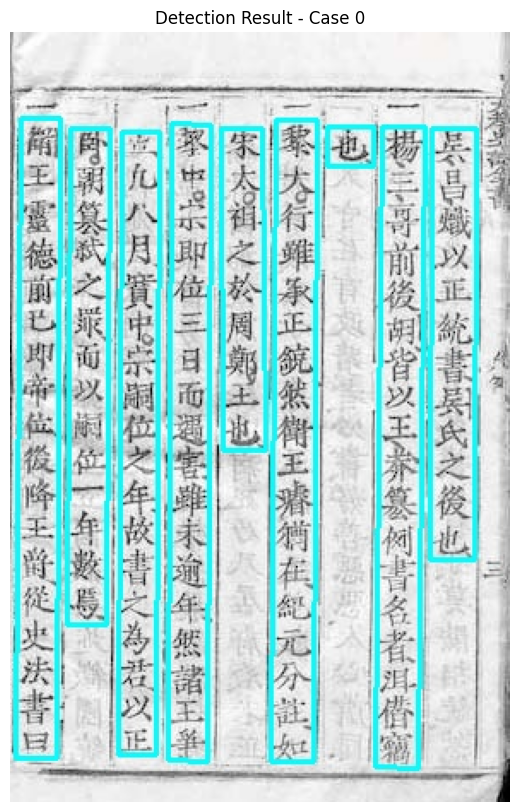

/usr/local/lib/python3.11/dist-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)


[2025/05/27 19:30:27] ppocr WARNING: Skipping import of the encryption module.
[2025/05/27 19:30:27] ppocr INFO: Architecture : 
[2025/05/27 19:30:27] ppocr INFO:     Backbone : 
[2025/05/27 19:30:27] ppocr INFO:         layers : 18
[2025/05/27 19:30:27] ppocr INFO:         name : ResNet_vd
[2025/05/27 19:30:27] ppocr INFO:     Head : 
[2025/05/27 19:30:27] ppocr INFO:         k : 50
[2025/05/27 19:30:27] ppocr INFO:         name : DBHead
[2025/05/27 19:30:27] ppocr INFO:     Neck : 
[2025/05/27 19:30:27] ppocr INFO:         name : DBFPN
[2025/05/27 19:30:27] ppocr INFO:         out_channels : 256
[2025/05/27 19:30:27] ppocr INFO:     Transform : None
[2025/05/27 19:30:27] ppocr INFO:     algorithm : DB
[2025/05/27 19:30:27] ppocr INFO:     model_type : det
[2025/05/27 19:30:27] ppocr INFO: Eval : 
[2025/05/27 19:30:27] ppocr INFO:     dataset : 
[2025/05/27 19:30:27] ppocr INFO:         data_dir : /kaggle/input/d/toruhtgpu2/nomnaocr/data/Pages
[2025/05/27 19:30:27] ppocr INFO:        

W0527 19:30:27.099867  9619 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 12.6, Runtime API Version: 11.8
W0527 19:30:27.101109  9619 gpu_resources.cc:164] device: 0, cuDNN Version: 8.9.


[2025/05/27 19:30:27] ppocr INFO: load pretrain successful from /kaggle/input/dbnet/other/default/1/model (1)
[2025/05/27 19:30:27] ppocr INFO: infer_img: /kaggle/input/d/toruhtgpu2/nomnaocr/data/Pages/DVSKTT-1 Quyen thu/imgs/DVSKTT_thu_V_4a.jpg
[2025/05/27 19:30:27] ppocr INFO: The detected Image saved in ./eval/case_1/det_results/DVSKTT_thu_V_4a.jpg
[2025/05/27 19:30:27] ppocr INFO: success!
Saved 9 cropped and rotated images for /kaggle/input/d/toruhtgpu2/nomnaocr/data/Pages/DVSKTT-1 Quyen thu/imgs/DVSKTT_thu_V_4a.jpg


/usr/local/lib/python3.11/dist-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
W0527 19:30:33.170483  9634 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 12.6, Runtime API Version: 11.8
W0527 19:30:33.171566  9634 gpu_resources.cc:164] device: 0, cuDNN Version: 8.9.
W0527 19:30:34.113821  9634 multiply_fwd_func.cc:76] got different data type, run type promotion automatically, this may cause data type been changed.
/usr/local/lib/python3.11/dist-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md


Case 1: GT='廢帝一簡定即位建元在丁亥年十月而稱一年者尊正統黜僣僞與紹慶元年同一陳末二胡之後明人併㨿凣二十年止以四年属明者盖癸巳以前簡定重光猶係陳緒戊戌以後我朝太祖高皇帝已起義兵故不以属明書正國統也一人名地名有考㨿分註其下無則闕之'
Case 1: PRED='廢帝一簡定即位建元在丁亥年十月而稱一年者尊正統黜僣僞與紹慶元年同陳末二胡之後明人併凡二十年止以四年属明者盖癸巳以前簡定重光猶係陳緒戊戌以後我朝太祖髙皇帝已起義兵故不以佗明書正國統也人名地名有考分此其下無則鬪之'


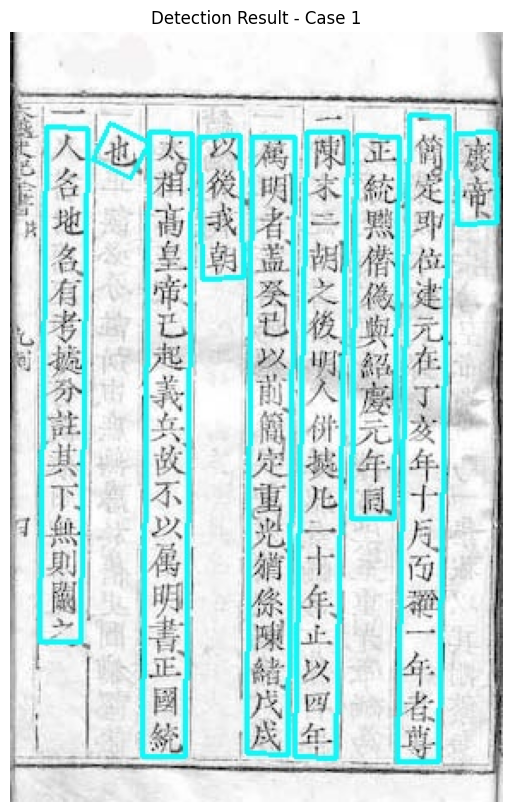

/usr/local/lib/python3.11/dist-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)


[2025/05/27 19:31:34] ppocr WARNING: Skipping import of the encryption module.
[2025/05/27 19:31:34] ppocr INFO: Architecture : 
[2025/05/27 19:31:34] ppocr INFO:     Backbone : 
[2025/05/27 19:31:34] ppocr INFO:         layers : 18
[2025/05/27 19:31:34] ppocr INFO:         name : ResNet_vd
[2025/05/27 19:31:34] ppocr INFO:     Head : 
[2025/05/27 19:31:34] ppocr INFO:         k : 50
[2025/05/27 19:31:34] ppocr INFO:         name : DBHead
[2025/05/27 19:31:34] ppocr INFO:     Neck : 
[2025/05/27 19:31:34] ppocr INFO:         name : DBFPN
[2025/05/27 19:31:34] ppocr INFO:         out_channels : 256
[2025/05/27 19:31:34] ppocr INFO:     Transform : None
[2025/05/27 19:31:34] ppocr INFO:     algorithm : DB
[2025/05/27 19:31:34] ppocr INFO:     model_type : det
[2025/05/27 19:31:34] ppocr INFO: Eval : 
[2025/05/27 19:31:34] ppocr INFO:     dataset : 
[2025/05/27 19:31:34] ppocr INFO:         data_dir : /kaggle/input/d/toruhtgpu2/nomnaocr/data/Pages
[2025/05/27 19:31:34] ppocr INFO:        

W0527 19:31:34.156041  9742 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 12.6, Runtime API Version: 11.8
W0527 19:31:34.157177  9742 gpu_resources.cc:164] device: 0, cuDNN Version: 8.9.


[2025/05/27 19:31:34] ppocr INFO: load pretrain successful from /kaggle/input/dbnet/other/default/1/model (1)
[2025/05/27 19:31:34] ppocr INFO: infer_img: /kaggle/input/d/toruhtgpu2/nomnaocr/data/Pages/DVSKTT-1 Quyen thu/imgs/DVSKTT_thu_V_4b.jpg
[2025/05/27 19:31:34] ppocr INFO: The detected Image saved in ./eval/case_2/det_results/DVSKTT_thu_V_4b.jpg
[2025/05/27 19:31:34] ppocr INFO: success!
Saved 9 cropped and rotated images for /kaggle/input/d/toruhtgpu2/nomnaocr/data/Pages/DVSKTT-1 Quyen thu/imgs/DVSKTT_thu_V_4b.jpg


/usr/local/lib/python3.11/dist-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
W0527 19:31:40.296087  9757 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 12.6, Runtime API Version: 11.8
W0527 19:31:40.297202  9757 gpu_resources.cc:164] device: 0, cuDNN Version: 8.9.
W0527 19:31:41.201848  9757 multiply_fwd_func.cc:76] got different data type, run type promotion automatically, this may cause data type been changed.
/usr/local/lib/python3.11/dist-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md


Case 2: GT='一凣書日舊史甲子有闕依日庶書之一凣正誤必分註所由庶無惑於舊史間猶謬誤知者幸正之續編凣例一外紀全書自鴻庞氏至吳使君舊史編爲一集并本己全書自李太祖至昭皇編爲一集自陳太宗至明宗編爲一集陳憲宗至重光帝編爲一集及本己實錄國朝聖宗淳皇帝?載爲一集兹以其刪繁每'
Case 2: PRED='凣書日舊史甲子有闕依日庶書之凣正誤必分註所由庶無惑於舊史間猶謬誤續編凣例外紀全書自鴻庞氏至吳使君舊史編爲一集并本己全書自李太祖至昭皇編爲一集自陳圖朝聖宗淳皇帝載爲一集極以其刪繁每知者幸正之太宗至明宗編爲一集陳憲宗至重光帝編爲一集及本紀實錄'


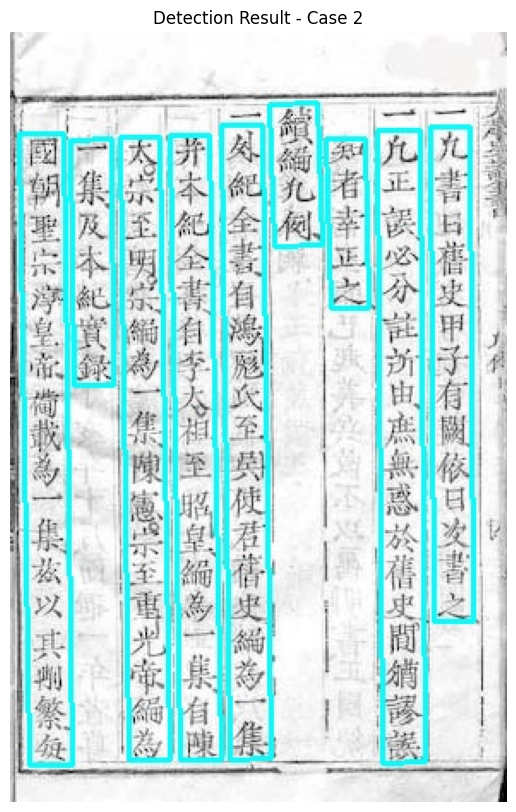

/usr/local/lib/python3.11/dist-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)


[2025/05/27 19:32:40] ppocr WARNING: Skipping import of the encryption module.
[2025/05/27 19:32:40] ppocr INFO: Architecture : 
[2025/05/27 19:32:40] ppocr INFO:     Backbone : 
[2025/05/27 19:32:40] ppocr INFO:         layers : 18
[2025/05/27 19:32:40] ppocr INFO:         name : ResNet_vd
[2025/05/27 19:32:40] ppocr INFO:     Head : 
[2025/05/27 19:32:40] ppocr INFO:         k : 50
[2025/05/27 19:32:40] ppocr INFO:         name : DBHead
[2025/05/27 19:32:40] ppocr INFO:     Neck : 
[2025/05/27 19:32:40] ppocr INFO:         name : DBFPN
[2025/05/27 19:32:40] ppocr INFO:         out_channels : 256
[2025/05/27 19:32:40] ppocr INFO:     Transform : None
[2025/05/27 19:32:40] ppocr INFO:     algorithm : DB
[2025/05/27 19:32:40] ppocr INFO:     model_type : det
[2025/05/27 19:32:40] ppocr INFO: Eval : 
[2025/05/27 19:32:40] ppocr INFO:     dataset : 
[2025/05/27 19:32:40] ppocr INFO:         data_dir : /kaggle/input/d/toruhtgpu2/nomnaocr/data/Pages
[2025/05/27 19:32:40] ppocr INFO:        

W0527 19:32:40.909464  9865 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 12.6, Runtime API Version: 11.8
W0527 19:32:40.910627  9865 gpu_resources.cc:164] device: 0, cuDNN Version: 8.9.


[2025/05/27 19:32:41] ppocr INFO: load pretrain successful from /kaggle/input/dbnet/other/default/1/model (1)
[2025/05/27 19:32:41] ppocr INFO: infer_img: /kaggle/input/d/toruhtgpu2/nomnaocr/data/Pages/DVSKTT-1 Quyen thu/imgs/DVSKTT_thu_V_5a.jpg
[2025/05/27 19:32:41] ppocr INFO: The detected Image saved in ./eval/case_3/det_results/DVSKTT_thu_V_5a.jpg
[2025/05/27 19:32:41] ppocr INFO: success!
Saved 9 cropped and rotated images for /kaggle/input/d/toruhtgpu2/nomnaocr/data/Pages/DVSKTT-1 Quyen thu/imgs/DVSKTT_thu_V_5a.jpg


/usr/local/lib/python3.11/dist-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
W0527 19:32:46.974961  9880 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 12.6, Runtime API Version: 11.8
W0527 19:32:46.976280  9880 gpu_resources.cc:164] device: 0, cuDNN Version: 8.9.
W0527 19:32:47.872479  9880 multiply_fwd_func.cc:76] got different data type, run type promotion automatically, this may cause data type been changed.
/usr/local/lib/python3.11/dist-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md


Case 3: GT='一集分爲上下二集以便觀覽一恭皇爲權神莫登庸篡弑自丁亥至壬辰九六年無有位號則以次年紀之其莫僣則两行分註於次年之下以尊正統沮僣竊也一莊宗自癸巳年起義即位于行在萬賴󰀋雖未混一中元亦以正統書之明其爲帝胄承大統也一中宗英宗起義即位並以繼統書之明國緒相傳也'
Case 3: PRED='一集分爲上二十是使觀豊恭皇為權臣莫登庸篡弑自丁亥至壬辰凣六年無有位號則以次年紀之其莫僣則两行分註於次年之下以尊正統沮僣竊竊禁宗自癸巳年起義即位于行在萬頼雖未混一中元亦以正統書之明其爲帝胄承大統也中宗英宗起義即位並以繼統書之明國緒相傳也'


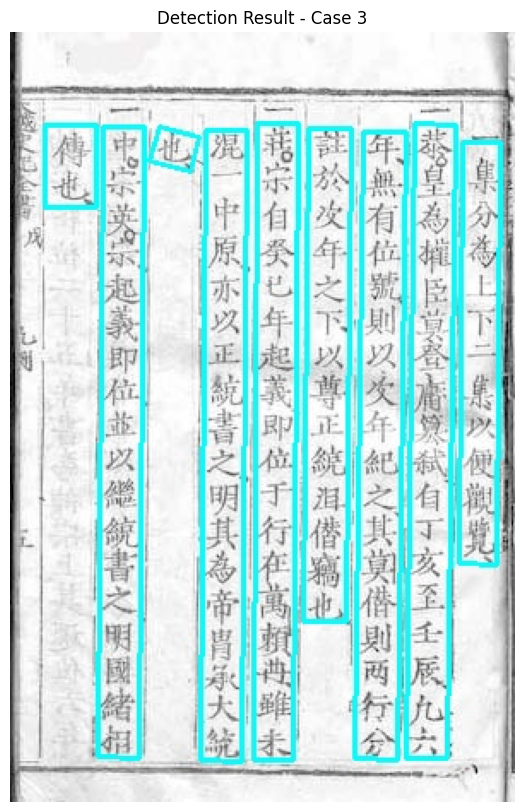

/usr/local/lib/python3.11/dist-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)


[2025/05/27 19:33:47] ppocr WARNING: Skipping import of the encryption module.
[2025/05/27 19:33:47] ppocr INFO: Architecture : 
[2025/05/27 19:33:47] ppocr INFO:     Backbone : 
[2025/05/27 19:33:47] ppocr INFO:         layers : 18
[2025/05/27 19:33:47] ppocr INFO:         name : ResNet_vd
[2025/05/27 19:33:47] ppocr INFO:     Head : 
[2025/05/27 19:33:47] ppocr INFO:         k : 50
[2025/05/27 19:33:47] ppocr INFO:         name : DBHead
[2025/05/27 19:33:47] ppocr INFO:     Neck : 
[2025/05/27 19:33:47] ppocr INFO:         name : DBFPN
[2025/05/27 19:33:47] ppocr INFO:         out_channels : 256
[2025/05/27 19:33:47] ppocr INFO:     Transform : None
[2025/05/27 19:33:47] ppocr INFO:     algorithm : DB
[2025/05/27 19:33:47] ppocr INFO:     model_type : det
[2025/05/27 19:33:47] ppocr INFO: Eval : 
[2025/05/27 19:33:47] ppocr INFO:     dataset : 
[2025/05/27 19:33:47] ppocr INFO:         data_dir : /kaggle/input/d/toruhtgpu2/nomnaocr/data/Pages
[2025/05/27 19:33:47] ppocr INFO:        

W0527 19:33:47.528009  9988 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 12.6, Runtime API Version: 11.8
W0527 19:33:47.529161  9988 gpu_resources.cc:164] device: 0, cuDNN Version: 8.9.


[2025/05/27 19:33:47] ppocr INFO: load pretrain successful from /kaggle/input/dbnet/other/default/1/model (1)
[2025/05/27 19:33:47] ppocr INFO: infer_img: /kaggle/input/d/toruhtgpu2/nomnaocr/data/Pages/DVSKTT-1 Quyen thu/imgs/DVSKTT_thu_V_5b.jpg
[2025/05/27 19:33:48] ppocr INFO: The detected Image saved in ./eval/case_4/det_results/DVSKTT_thu_V_5b.jpg
[2025/05/27 19:33:48] ppocr INFO: success!
Saved 3 cropped and rotated images for /kaggle/input/d/toruhtgpu2/nomnaocr/data/Pages/DVSKTT-1 Quyen thu/imgs/DVSKTT_thu_V_5b.jpg


/usr/local/lib/python3.11/dist-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
W0527 19:33:53.534274 10003 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 12.6, Runtime API Version: 11.8
W0527 19:33:53.535548 10003 gpu_resources.cc:164] device: 0, cuDNN Version: 8.9.
W0527 19:33:54.455801 10003 multiply_fwd_func.cc:76] got different data type, run type promotion automatically, this may cause data type been changed.
/usr/local/lib/python3.11/dist-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md


Case 4: GT='一神宗在位二十五年書爲神宗上其遜位六年書在真宗紀又復帝位十三年書爲神宗下凣例畢'
Case 4: PRED='神宗在位二十五年書爲神宗上其遵位六年書在真宗紀又復帝位十三年書爲神宗下辛酉軍'


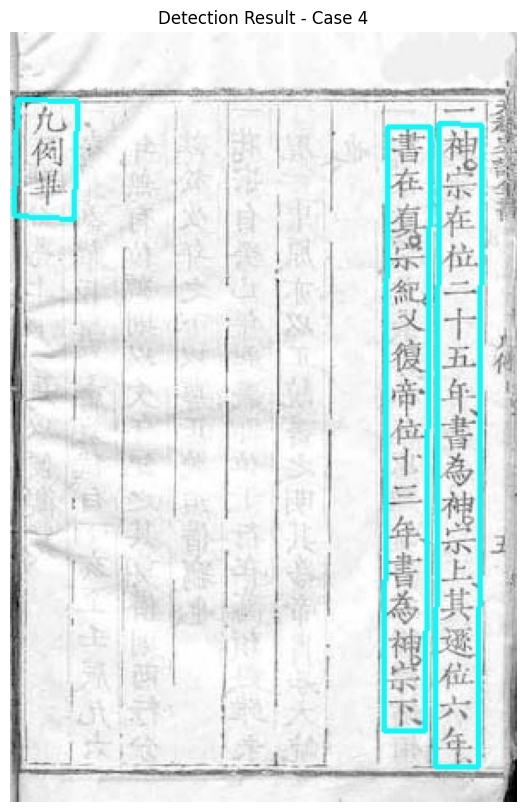

/usr/local/lib/python3.11/dist-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)


[2025/05/27 19:34:13] ppocr WARNING: Skipping import of the encryption module.
[2025/05/27 19:34:13] ppocr INFO: Architecture : 
[2025/05/27 19:34:13] ppocr INFO:     Backbone : 
[2025/05/27 19:34:13] ppocr INFO:         layers : 18
[2025/05/27 19:34:13] ppocr INFO:         name : ResNet_vd
[2025/05/27 19:34:13] ppocr INFO:     Head : 
[2025/05/27 19:34:13] ppocr INFO:         k : 50
[2025/05/27 19:34:13] ppocr INFO:         name : DBHead
[2025/05/27 19:34:13] ppocr INFO:     Neck : 
[2025/05/27 19:34:13] ppocr INFO:         name : DBFPN
[2025/05/27 19:34:13] ppocr INFO:         out_channels : 256
[2025/05/27 19:34:13] ppocr INFO:     Transform : None
[2025/05/27 19:34:13] ppocr INFO:     algorithm : DB
[2025/05/27 19:34:13] ppocr INFO:     model_type : det
[2025/05/27 19:34:13] ppocr INFO: Eval : 
[2025/05/27 19:34:13] ppocr INFO:     dataset : 
[2025/05/27 19:34:13] ppocr INFO:         data_dir : /kaggle/input/d/toruhtgpu2/nomnaocr/data/Pages
[2025/05/27 19:34:13] ppocr INFO:        

W0527 19:34:13.717693 10039 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 12.6, Runtime API Version: 11.8
W0527 19:34:13.718915 10039 gpu_resources.cc:164] device: 0, cuDNN Version: 8.9.


[2025/05/27 19:34:13] ppocr INFO: load pretrain successful from /kaggle/input/dbnet/other/default/1/model (1)
[2025/05/27 19:34:14] ppocr INFO: infer_img: /kaggle/input/d/toruhtgpu2/nomnaocr/data/Pages/DVSKTT-2 Ngoai ky toan thu/imgs/DVSKTT_ngoai_V_18a.jpg
[2025/05/27 19:34:14] ppocr INFO: The detected Image saved in ./eval/case_5/det_results/DVSKTT_ngoai_V_18a.jpg
[2025/05/27 19:34:14] ppocr INFO: success!
Saved 13 cropped and rotated images for /kaggle/input/d/toruhtgpu2/nomnaocr/data/Pages/DVSKTT-2 Ngoai ky toan thu/imgs/DVSKTT_ngoai_V_18a.jpg


/usr/local/lib/python3.11/dist-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
W0527 19:34:19.835281 10054 gpu_resources.cc:119] Please NOTE: device: 0, GPU Compute Capability: 6.0, Driver API Version: 12.6, Runtime API Version: 11.8
W0527 19:34:19.836458 10054 gpu_resources.cc:164] device: 0, cuDNN Version: 8.9.
W0527 19:34:20.737294 10054 multiply_fwd_func.cc:76] got different data type, run type promotion automatically, this may cause data type been changed.
/usr/local/lib/python3.11/dist-packages/paddle/utils/cpp_extension/extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md


In [ ]:
det_config = "dbnet_eval.yml"
rec_config = "rec_sar_eval.yml"
txt_path =  "/kaggle/input/d/toruhtgpu2/nomnaocr/data/Pages/Test_prose.txt"
out_dir = "./eval"
main(txt_path, det_config, rec_config, out_dir)